In [1]:

import pandas as pd
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

train_data = pd.read_csv("Train.csv", sep=',')
another_test = train_data.tail(300)
train_data = train_data.head(3000)
test_data = pd.read_csv("Test.csv", sep=',')
test_data = test_data.head(150)
X_train_raw = [x[0] for x in train_data[['text']].values]
Y_train = [x[0] for x in train_data[['sentiment']].values]
X_test_raw = [x[0] for x in test_data[['text']].values]
X_test_another = [x[0] for x in another_test[['text']].values]
Y_test_another = [x[0] for x in another_test[['sentiment']].values]
X_train_clean = []
X_test_clean = []
X_test_another_clean = []

lemmatizer = WordNetLemmatizer()

# Cleaning Train Data
for line in X_train_raw:
    # Remove non-alphanumerics
    line = re.sub("[^a-z0-9]"," ", line)
    line = re.sub(r'[0-9]+', '', line)
    # Remove handles and hashtags
    line = re.sub("@[A-Za-z0-9_]+","", line)
    line = re.sub("#[A-Za-z0-9_]+","", line)
    
    # Remove links
    line = re.sub(r"http\S+", "", line)
    line = re.sub(r"www.\S+", "", line)
    
    # Remove Punctuation
    words = line.split()
    token_text = [lemmatizer.lemmatize(word, pos = 'v')
          for word in words
          if not word in stopwords.words()]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in token_text]
    X_train_clean.append(' '.join(stripped))
    
# Cleaning Test Data
for line in X_test_raw:
    # Remove non-alphanumerics
    line = re.sub("[^a-z0-9]"," ", line)
    line = re.sub(r'[0-9]+', '', line)
    # Remove handles and hashtags
    line = re.sub("@[A-Za-z0-9_]+","", line)
    line = re.sub("#[A-Za-z0-9_]+","", line)
    
    # Remove links
    line = re.sub(r"http\S+", "", line)
    line = re.sub(r"www.\S+", "", line)
    
    # Remove Punctuation
    words = line.split()
    token_text = [lemmatizer.lemmatize(word, pos = 'v')
          for word in words
          if not word in stopwords.words()]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in token_text]

    X_test_clean.append(' '.join(stripped))

# Another Test Set 
for line in X_test_another:
    # Remove non-alphanumerics
    line = re.sub("[^a-z0-9]"," ", line)
    line = re.sub(r'[0-9]+', '', line)
    # Remove handles and hashtags
    line = re.sub("@[A-Za-z0-9_]+","", line)
    line = re.sub("#[A-Za-z0-9_]+","", line)
    
    # Remove links
    line = re.sub(r"http\S+", "", line)
    line = re.sub(r"www.\S+", "", line)
    
    # Remove Punctuation
    words = line.split()
    token_text = [lemmatizer.lemmatize(word, pos = 'v')
          for word in words
          if not word in stopwords.words()]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in token_text]

    X_test_another_clean.append(' '.join(stripped))

X_train_cleaned = pd.DataFrame(X_train_clean, columns = ['comments'])
X_train_cleaned.to_csv("Train_clean_main.csv", index=False)
X_test_cleaned = pd.DataFrame(X_test_clean, columns = ['comments'])
X_test_cleaned.to_csv("Test_clean_main.csv", index=False)
X_test_cleaned_another = pd.DataFrame(X_test_clean, columns = ['comments'])
X_test_cleaned_another.to_csv("Test_clean_another.csv", index=False)
Y_train_vec = []
for sentiment in Y_train:
    if(sentiment == 'neutral'):
        Y_train_vec.append(1)
    if(sentiment == 'negative'):
        Y_train_vec.append(0)
    if(sentiment == 'positive'):
        Y_train_vec.append(2)
Y_train_vec_pd = pd.DataFrame(Y_train_vec, columns = ['sentiments'])
Y_train_vec_pd.to_csv("labels_main.csv", index=False)


In [2]:
# Another dataset for testing in case the dataset has unbalanced class labels
Y_test_cleaned = []
for sentiment in Y_test_another:
    if(sentiment == 'neutral'):
        Y_test_cleaned.append(1)
    if(sentiment == 'negative'):
        Y_test_cleaned.append(0)
    if(sentiment == 'positive'):
        Y_test_cleaned.append(2)
Y_test_vec_pd = pd.DataFrame(Y_test_cleaned, columns = ['sentiments'])
Y_test_vec_pd.to_csv("labels_another.csv", index=False)



In [3]:
# Train-test split for the training data
from sklearn.model_selection import train_test_split
X_train_cleaned["Sentiment Score"] = pd.DataFrame(Y_train_vec, columns=["Sentiment Score"])
X_train, X_test, y_train, y_test = train_test_split(X_train_clean, Y_train_vec, test_size=0.2, random_state=42)


In [4]:
# Vectorizing

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_idf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_idf = tfidf_vectorizer.transform(X_test).toarray()
X_test_another_idf = tfidf_vectorizer.transform(X_test_another).toarray()
#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
X_testset_idf = tfidf_vectorizer.transform(X_test_clean).toarray()


In [5]:
print(X_test_idf.shape)
print(X_train_idf.shape)

(600, 8156)
(2400, 8156)


## Zero-R Baseline

Zero-R Accuracy:  0.5466666666666666
Zero-R Accuracy (Another Dataset):  0.5466666666666666
Training time: 0.0 s; Prediction time: 0.0 s
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       109
           1       0.55      1.00      0.71       328
           2       0.00      0.00      0.00       163

    accuracy                           0.55       600
   macro avg       0.18      0.33      0.24       600
weighted avg       0.30      0.55      0.39       600



Text(0.5, 1.0, 'Confusion Matrix')

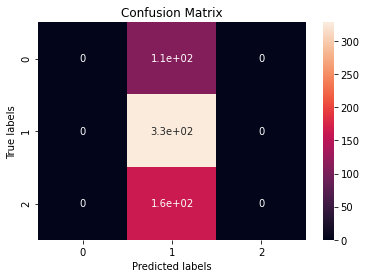

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import classification_report
import time

from sklearn.dummy import DummyClassifier

from sklearn.feature_extraction.text import CountVectorizer
BoW_vectorizer = CountVectorizer(ngram_range=(1,2))

#Build the feature set (vocabulary) and vectorise the Tarin dataset using BoW
X_train_BoW = BoW_vectorizer.fit_transform(X_train).toarray()
X_test_BoW = BoW_vectorizer.transform(X_test).toarray()
X_test_another_BoW = BoW_vectorizer.transform(X_test_another)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
X_testset_BoW = BoW_vectorizer.transform(X_test_clean).toarray()

dummy_clf = DummyClassifier(strategy="most_frequent")
t0 = time.time()
dummy_clf.fit(X_train_BoW, y_train)
t1 = time.time()
dummy_pred = dummy_clf.predict(X_test_BoW)
t2 = time.time()
dummy_pred_another = dummy_clf.predict(X_test_another_BoW)

# Test Accuracies
ax= plt.subplot()
#zr_training_accuracy = accuracy_score(y_train, dummy_pred)
zr_test_accuracy = accuracy_score(y_test, dummy_pred)
zr_test_accuracy_another = accuracy_score(Y_test_cleaned, dummy_pred_another)
print("Zero-R Accuracy: ", zr_test_accuracy)
print("Zero-R Accuracy (Another Dataset): ", zr_test_accuracy_another)
time_train_zr = t1-t0
time_predict_zr = t2-t1
# results
print(f"Training time: {round(time_train_zr,3)} s; Prediction time: {round(time_predict_zr, 3)} s")


# results
# print(f"Training time: {round(time_train_mnb,3)} s; Prediction time: {round(time_predict_mnb, 3)} s")
cf_matrix_dummy = confusion_matrix(y_test, dummy_pred)
print(classification_report(y_test, dummy_pred, zero_division = 0))
FP_dummy = cf_matrix_dummy.sum(axis=0) - np.diag(cf_matrix_dummy)  
FN_dummy = cf_matrix_dummy.sum(axis=1) - np.diag(cf_matrix_dummy)
TP_dummy = np.diag(cf_matrix_dummy)
TN_dummy = cf_matrix_dummy.sum() - (FP_dummy + FN_dummy + TP_dummy)

sns.heatmap(cf_matrix_dummy, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')



## Multinomial Bayes
With BoW Model

Multinomial Bayes Accuracy:  0.6033333333333334
Multinomial Bayes Accuracy (Another Dataset):  0.5966666666666667
Training time: 1.291 s; Prediction time: 0.036 s
              precision    recall  f1-score   support

           0       0.70      0.17      0.28       109
           1       0.60      0.86      0.71       328
           2       0.58      0.37      0.46       163

    accuracy                           0.60       600
   macro avg       0.63      0.47      0.48       600
weighted avg       0.62      0.60      0.56       600



Text(0.5, 1.0, 'Confusion Matrix')

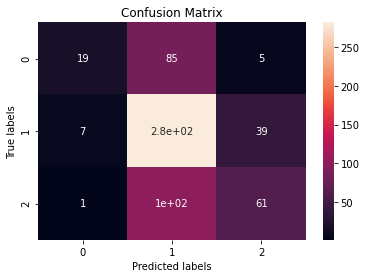

In [7]:

# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB


mnb = MultinomialNB()
t0 = time.time()
mnb.fit(X_train_BoW, y_train)
t1 = time.time()
# Multinomial Naive Bayes Predictions
# Test.csv predictions
test_pred_mnb = mnb.predict(X_testset_BoW)
t2 = time.time()
# Training set predictions
y_train_pred_mnb = mnb.predict(X_train_BoW)
y_test_pred_mnb = mnb.predict(X_test_BoW)
y_test_pred_another = mnb.predict(X_test_another_BoW)

# Test Accuracies
ax= plt.subplot()
nb_training_accuracy = accuracy_score(y_train, y_train_pred_mnb)
nb_test_accuracy = accuracy_score(y_test, y_test_pred_mnb)
nb_test_accuracy_another = accuracy_score(Y_test_cleaned, y_test_pred_another)
print("Multinomial Bayes Accuracy: ", nb_test_accuracy)
print("Multinomial Bayes Accuracy (Another Dataset): ", nb_test_accuracy_another)

time_train_mnb = t1-t0
time_predict_mnb = t2-t1
# results
print(f"Training time: {round(time_train_mnb,3)} s; Prediction time: {round(time_predict_mnb, 3)} s")
cf_matrix = confusion_matrix(y_test, y_test_pred_mnb)
print(classification_report(y_test, y_test_pred_mnb, zero_division = 0))
FP_mnb = cf_matrix.sum(axis=0) - np.diag(cf_matrix)  
FN_mnb = cf_matrix.sum(axis=1) - np.diag(cf_matrix)
TP_mnb = np.diag(cf_matrix)
TN_mnb = cf_matrix.sum() - (FP_mnb + FN_mnb + TP_mnb)

#fp = cf_matrix.sum(axis=0) - np.diag(cf_matrix)  
#fn = cf_matrix.sum(axis=1) - np.diag(cf_matrix)
#tp = np.diag(cf_matrix)
#tn = cf_matrix.sum() - (FP + FN + TP)


# print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

## Gaussian Naive Bayes


Gaussian Naive Bayes Accuracy:  0.5266666666666666
Gaussian Naive Bayes Accuracy (Another Dataset):  0.47333333333333333
Training time: 2.723 s; Prediction time: 0.059 s
              precision    recall  f1-score   support

           0       0.44      0.38      0.40       109
           1       0.60      0.60      0.60       328
           2       0.44      0.48      0.46       163

    accuracy                           0.53       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.53      0.53      0.53       600



Text(0.5, 1.0, 'Confusion Matrix')

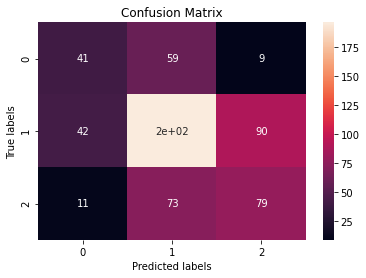

In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
t0 = time.time()
gnb.fit(X_train_BoW, y_train)
t1 = time.time()
# Multinomial Naive Bayes Predictions
# Test.csv predictions
test_pred_gnb = gnb.predict(X_testset_BoW)
t2 = time.time()
# Training set predictions
y_train_pred_gnb = gnb.predict(X_train_BoW)
y_test_pred_gnb = gnb.predict(X_test_BoW)
y_test_pred_gnb_another = gnb.predict(X_test_another_BoW.toarray())

# Test Accuracies
ax= plt.subplot()
gnb_training_accuracy = accuracy_score(y_train, y_train_pred_gnb)
gnb_test_accuracy = accuracy_score(y_test, y_test_pred_gnb)
gnb_test_accuracy_another = accuracy_score(Y_test_cleaned, y_test_pred_gnb_another)

print("Gaussian Naive Bayes Accuracy: ", gnb_test_accuracy)
print("Gaussian Naive Bayes Accuracy (Another Dataset): ", gnb_test_accuracy_another)
time_train_gnb = t1-t0
time_predict_gnb = t2-t1
# results
print(f"Training time: {round(time_train_gnb,3)} s; Prediction time: {round(time_predict_gnb, 3)} s")
cf_matrix = confusion_matrix(y_test, y_test_pred_gnb)
print(classification_report(y_test, y_test_pred_gnb, zero_division = 0))
FP_gnb = cf_matrix.sum(axis=0) - np.diag(cf_matrix)  
FN_gnb = cf_matrix.sum(axis=1) - np.diag(cf_matrix)
TP_gnb = np.diag(cf_matrix)
TN_gnb = cf_matrix.sum() - (FP_gnb + FN_gnb + TP_gnb)

#fp = cf_matrix.sum(axis=0) - np.diag(cf_matrix)  
#fn = cf_matrix.sum(axis=1) - np.diag(cf_matrix)
#tp = np.diag(cf_matrix)
#tn = cf_matrix.sum() - (FP + FN + TP)


# print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

## Support Vector Machines

svm Accuracy:  0.635
svm Accuracy (Another Dataset):  0.5833333333333334
Training time: 31.089 s; Prediction time: 2.652 s
              precision    recall  f1-score   support

           0       0.87      0.12      0.21       109
           1       0.61      0.93      0.74       328
           2       0.73      0.39      0.51       163

    accuracy                           0.64       600
   macro avg       0.74      0.48      0.49       600
weighted avg       0.69      0.64      0.58       600



Text(0.5, 1.0, 'Confusion Matrix')

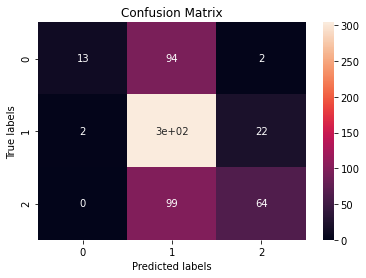

In [9]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', gamma = 1.2, C=10)
t0 = time.time()
svm.fit(X_train_idf, y_train)
t1 = time.time()
# Test.csv predictions
test_pred_svm = svm.predict(X_testset_idf)
t2 = time.time()
# Training set predictions
y_train_pred_svm = svm.predict(X_train_idf)
y_test_pred_svm = svm.predict(X_test_idf)
y_test_pred_svm_2 = svm.predict(X_test_another_idf)

# Test Accuracies
svm_training_accuracy = accuracy_score(y_train, y_train_pred_svm)
svm_test_accuracy = accuracy_score(y_test, y_test_pred_svm)
svm_test_accuracy_2 = accuracy_score(Y_test_cleaned, y_test_pred_svm_2)
# Test Accuracies
ax= plt.subplot()
print("svm Accuracy: ", svm_test_accuracy)
print("svm Accuracy (Another Dataset): ", svm_test_accuracy_2)
time_train_svm = t1-t0
time_predict_svm = t2-t1
# results
print(f"Training time: {round(time_train_svm,3)} s; Prediction time: {round(time_predict_svm, 3)} s")
cf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
print(classification_report(y_test, y_test_pred_svm))
FP_svm = cf_matrix_svm.sum(axis=0) - np.diag(cf_matrix_svm)  
FN_svm = cf_matrix_svm.sum(axis=1) - np.diag(cf_matrix_svm)
TP_svm = np.diag(cf_matrix_svm)
TN_svm = cf_matrix_svm.sum() - (FP_svm + FN_svm + TP_svm)
# print(cf_matrix)
sns.heatmap(cf_matrix_svm, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

## Bagged K-Nearest Neighbour


Bagged K-NN Accuracy:  0.5833333333333334
Bagged K-NN Accuracy (Another Dataset):  0.58
Training time: 2.077 s; Prediction time: 2.028 s
              precision    recall  f1-score   support

           0       0.62      0.22      0.32       109
           1       0.61      0.78      0.69       328
           2       0.50      0.42      0.46       163

    accuracy                           0.58       600
   macro avg       0.57      0.48      0.49       600
weighted avg       0.58      0.58      0.56       600



Text(0.5, 1.0, 'Confusion Matrix')

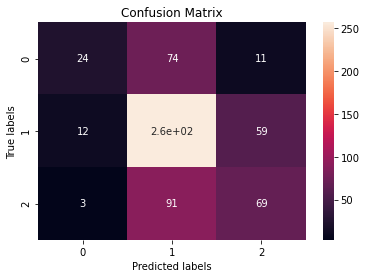

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
import time

k = 10

knn = KNeighborsClassifier(k)
bag_knn = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=42) 
t0 = time.time()
bag_knn.fit(X_train_idf, y_train)
t1 = time.time()
# Test.csv predictions
test_pred_knn = bag_knn.predict(X_testset_idf)
t2 = time.time()
# Training set predicitons
y_train_pred_knn = bag_knn.predict(X_train_idf)
y_test_pred_knn = bag_knn.predict(X_test_idf)
y_test_pred_knn_2 = bag_knn.predict(X_test_another_idf)



# Training Accuracies

# Test Accuracies
knn_training_accuracy = accuracy_score(y_train, y_train_pred_knn)
knn_test_bag_accuracy = accuracy_score(y_test, y_test_pred_knn)
knn_test_bag_accuracy_2 = accuracy_score(Y_test_cleaned, y_test_pred_knn_2)
# Test Accuracies
ax= plt.subplot()
print("Bagged K-NN Accuracy: ", knn_test_bag_accuracy)
print("Bagged K-NN Accuracy (Another Dataset): ", knn_test_bag_accuracy_2)
time_train_bag_knn = t1-t0
time_predict_bag_knn = t2-t1
# results
print(f"Training time: {round(time_train_bag_knn,3)} s; Prediction time: {round(time_predict_bag_knn, 3)} s")
print(classification_report(y_test, y_test_pred_knn))
cf_matrix_knn = confusion_matrix(y_test, y_test_pred_knn)
FP_knn = cf_matrix_knn.sum(axis=0) - np.diag(cf_matrix_knn)  
FN_knn = cf_matrix_knn.sum(axis=1) - np.diag(cf_matrix_knn)
TP_knn = np.diag(cf_matrix_knn)
TN_knn = cf_matrix_knn.sum() - (FP_knn + FN_knn + TP_knn)

# print(cf_matrix)
sns.heatmap(cf_matrix_knn, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

## K-Nearest Neighbour


K-NN Accuracy:  0.5883333333333334
K-NN Accuracy (Another Dataset):  0.5533333333333333
Training time: 0.083 s; Prediction time: 0.139 s
              precision    recall  f1-score   support

           0       0.55      0.24      0.33       109
           1       0.60      0.81      0.69       328
           2       0.54      0.37      0.44       163

    accuracy                           0.59       600
   macro avg       0.57      0.47      0.49       600
weighted avg       0.58      0.59      0.56       600



Text(0.5, 1.0, 'Confusion Matrix')

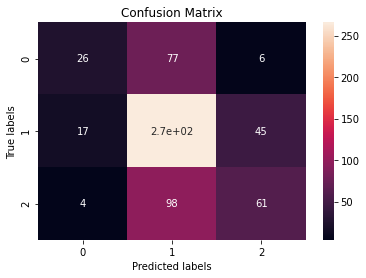

In [11]:
from sklearn.neighbors import KNeighborsClassifier

k = 10

knn = KNeighborsClassifier(k)
t0 = time.time()
knn.fit(X_train_idf, y_train)
t1 = time.time()
# Test.csv predictions
test_pred_knn = knn.predict(X_testset_idf)
t2 = time.time()
# Training set predicitons
y_train_pred_knn_nobag = knn.predict(X_train_idf)
y_test_pred_knn_nobag = knn.predict(X_test_idf)
y_test_pred_knn_nobag_2 = knn.predict(X_test_another_idf)


# Training Accuracies

# Test Accuracies
knn_training_accuracy = accuracy_score(y_train, y_train_pred_knn_nobag)
knn_test_accuracy = accuracy_score(y_test, y_test_pred_knn_nobag)
knn_test_accuracy_2 = accuracy_score(Y_test_cleaned, y_test_pred_knn_nobag_2)

# Test Accuracies
ax= plt.subplot()
print("K-NN Accuracy: ", knn_test_accuracy)
print("K-NN Accuracy (Another Dataset): ", knn_test_accuracy_2)


time_train_bag_knn = t1-t0
time_predict_bag_knn = t2-t1
# results
print(f"Training time: {round(time_train_bag_knn,3)} s; Prediction time: {round(time_predict_bag_knn, 3)} s")
print(classification_report(y_test, y_test_pred_knn_nobag))
cf_matrix_knn_nobag = confusion_matrix(y_test, y_test_pred_knn_nobag)
FP_knn_nobag = cf_matrix_knn_nobag.sum(axis=0) - np.diag(cf_matrix_knn_nobag)  
FN_knn_nobag= cf_matrix_knn_nobag.sum(axis=1) - np.diag(cf_matrix_knn_nobag)
TP_knn_nobag= np.diag(cf_matrix_knn_nobag)
TN_knn_nobag= cf_matrix_knn_nobag.sum() - (FP_knn_nobag + FN_knn_nobag + TP_knn_nobag)

# print(cf_matrix)
sns.heatmap(cf_matrix_knn_nobag, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

## Random Forests

Random Forest Accuracy:  0.5766666666666667
Random Forest Accuracy (Another Dataset):  0.5466666666666666
Training time: 1.493 s; Prediction time: 0.007 s
              precision    recall  f1-score   support

           0       0.41      0.17      0.25       109
           1       0.59      0.80      0.68       328
           2       0.58      0.39      0.46       163

    accuracy                           0.58       600
   macro avg       0.53      0.46      0.46       600
weighted avg       0.56      0.58      0.54       600



Text(0.5, 1.0, 'Confusion Matrix')

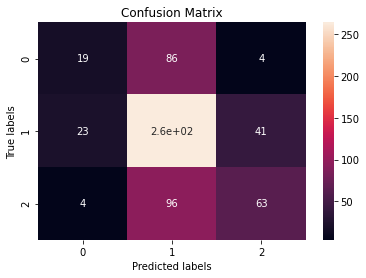

In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)
t0 = time.time()
rfc.fit(X_train_idf, y_train)
t1 = time.time()
# Test.csv predictions
test_pred_rfc = rfc.predict(X_testset_idf)
t2 = time.time()
# Training set predictions
y_train_pred_rfc = rfc.predict(X_train_idf)
y_test_pred_rfc = rfc.predict(X_test_idf)
y_test_pred_rfc_2 = rfc.predict(X_test_another_idf)

# Training Accuracies
rf_training_accuracy = accuracy_score(y_train, y_train_pred_rfc)
rf_test_accuracy = accuracy_score(y_test, y_test_pred_rfc)
rf_test_accuracy_2 = accuracy_score(Y_test_cleaned, y_test_pred_rfc_2)


# Test Accuracies
ax= plt.subplot()
print("Random Forest Accuracy: ", rf_test_accuracy)
print("Random Forest Accuracy (Another Dataset): ", rf_test_accuracy_2)


time_train_rf = t1-t0
time_predict_rf = t2-t1
# results
print(f"Training time: {round(time_train_rf,3)} s; Prediction time: {round(time_predict_rf, 3)} s")
print(classification_report(y_test, y_test_pred_rfc))
cf_matrix_rf = confusion_matrix(y_test, y_test_pred_rfc)
FP_rf = cf_matrix_rf.sum(axis=0) - np.diag(cf_matrix_rf)  
FN_rf= cf_matrix_rf.sum(axis=1) - np.diag(cf_matrix_rf)
TP_rf= np.diag(cf_matrix_rf)
TN_rf= cf_matrix_rf.sum() - (FP_rf + FN_rf + TP_rf)



# print(cf_matrix)
sns.heatmap(cf_matrix_rf, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

## Decision Trees


Decision Tree Accuracy:  0.5716666666666667
Decision Tree Accuracy (Another Dataset):  0.57
Training time: 29.245 s; Prediction time: 0.024 s
              precision    recall  f1-score   support

           0       0.39      0.31      0.35       109
           1       0.62      0.71      0.66       328
           2       0.55      0.47      0.50       163

    accuracy                           0.57       600
   macro avg       0.52      0.50      0.50       600
weighted avg       0.56      0.57      0.56       600



Text(0.5, 1.0, 'Confusion Matrix')

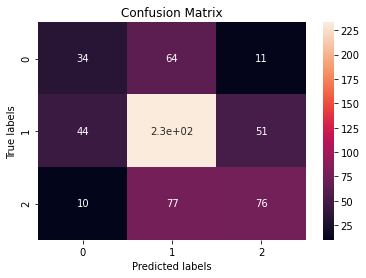

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
t0 = time.time()
tree.fit(X_train_BoW, y_train)
t1 = time.time()
test_pred_dt = tree.predict(X_testset_BoW)
t2 = time.time()
# Training Set predicitions
y_test_pred_BoW = tree.predict(X_test_BoW)
y_test_pred_BoW_2 = tree.predict(X_test_another_BoW)



# Evaluation Metrics
tree_test_accuracy = accuracy_score(y_test, y_test_pred_BoW)
tree_test_accuracy_2 = accuracy_score(Y_test_cleaned, y_test_pred_BoW_2)


ax= plt.subplot()
print("Decision Tree Accuracy: ", tree_test_accuracy)
print("Decision Tree Accuracy (Another Dataset): ", tree_test_accuracy_2)


time_train_dt = t1-t0
time_predict_dt = t2-t1
# results
print(f"Training time: {round(time_train_dt,3)} s; Prediction time: {round(time_predict_dt, 3)} s")
print(classification_report(y_test, y_test_pred_BoW))

cf_matrix_dt = confusion_matrix(y_test, y_test_pred_BoW)
FP_dt = cf_matrix_dt.sum(axis=0) - np.diag(cf_matrix_dt)  
FN_dt= cf_matrix_dt.sum(axis=1) - np.diag(cf_matrix_dt)
TP_dt= np.diag(cf_matrix_dt)
TN_dt= cf_matrix_dt.sum() - (FP_dt + FN_dt + TP_dt)
# print(cf_matrix)
sns.heatmap(cf_matrix_dt, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

## Bagged Decision Trees

Decision Tree Accuracy:  0.61
Decision Tree Accuracy (Another Dataset):  0.59
Training time: 158.146 s; Prediction time: 0.198 s
              precision    recall  f1-score   support

           0       0.45      0.27      0.34       109
           1       0.63      0.79      0.70       328
           2       0.61      0.48      0.54       163

    accuracy                           0.61       600
   macro avg       0.57      0.51      0.53       600
weighted avg       0.60      0.61      0.59       600



Text(0.5, 1.0, 'Confusion Matrix')

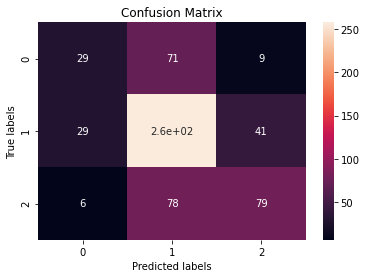

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag_tree = BaggingClassifier(base_estimator=tree, n_estimators=20, random_state=42) 
t0 = time.time()
bag_tree.fit(X_train_BoW, y_train)
t1 = time.time()
test_pred_bag_tree = bag_tree.predict(X_testset_BoW)
t2 = time.time()
# Training Set predicitions
y_test_pred_bag_tree = bag_tree.predict(X_test_BoW)
y_test_pred_bag_tree_2 = bag_tree.predict(X_test_another_BoW)

# Evaluation Metrics
bag_tree_test_accuracy = accuracy_score(y_test, y_test_pred_bag_tree)
bag_tree_test_accuracy_2 = accuracy_score(Y_test_cleaned, y_test_pred_bag_tree_2)


ax= plt.subplot()
print("Decision Tree Accuracy: ", bag_tree_test_accuracy)
print("Decision Tree Accuracy (Another Dataset): ", bag_tree_test_accuracy_2)


time_train_dt = t1-t0
time_predict_dt = t2-t1
# results
print(f"Training time: {round(time_train_dt,3)} s; Prediction time: {round(time_predict_dt, 3)} s")
print(classification_report(y_test, y_test_pred_bag_tree))

cf_matrix_bag_tree = confusion_matrix(y_test, y_test_pred_bag_tree)

FP_bag_tree = cf_matrix_bag_tree.sum(axis=0) - np.diag(cf_matrix_bag_tree)  
FN_bag_tree= cf_matrix_bag_tree.sum(axis=1) - np.diag(cf_matrix_bag_tree)
TP_bag_tree= np.diag(cf_matrix_bag_tree)
TN_bag_tree= cf_matrix_bag_tree.sum() - (FP_bag_tree+ FN_bag_tree + TP_bag_tree)

# print(cf_matrix)
sns.heatmap(cf_matrix_bag_tree, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

## Stacking a combination of base and ensemble learners
Multinomial Bayes, RBF SVM and Random Forest


In [15]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [('mnb', mnb), ('svm', svm)]

stacking = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression())
t0 = time.time()
stacking.fit(X_train_idf, y_train)
t1 = time.time()
# Test.csv predictions
test_pred_stack = stacking.predict(X_testset_idf)

t2 = time.time()
# Training Set predicitons
y_train_pred_stack = stacking.predict(X_train_idf)
y_test_pred_stack = stacking.predict(X_test_idf)



/Users/brendanlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Accuracy:  0.6366666666666667
Stacking Accuracy (Another Dataset):  0.5933333333333334
Training time: 153.447 s; Prediction time: 2.674 s
              precision    recall  f1-score   support

           0       0.79      0.14      0.23       109
           1       0.61      0.91      0.74       328
           2       0.72      0.41      0.52       163

    accuracy                           0.64       600
   macro avg       0.71      0.49      0.50       600
weighted avg       0.68      0.64      0.59       600



Text(0.5, 1.0, 'Confusion Matrix')

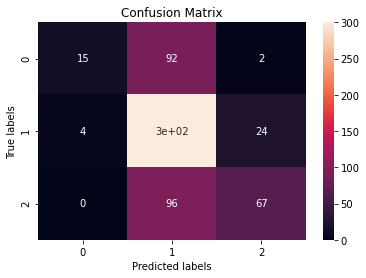

In [16]:
# Training Accuracy
test_pred_stack_2 = stacking.predict(X_test_another_idf)
stack_training_accuracy = accuracy_score(y_train, y_train_pred_stack)
stack_test_accuracy = accuracy_score(y_test, y_test_pred_stack)
stack_test_accuracy_2 = accuracy_score(Y_test_cleaned, test_pred_stack_2)
# Test Accuracies
ax= plt.subplot()
print("Stacking Accuracy: ", stack_test_accuracy)
print("Stacking Accuracy (Another Dataset): ", stack_test_accuracy_2)
time_train_stack = t1-t0
time_predict_stack = t2-t1
# results
print(f"Training time: {round(time_train_stack,3)} s; Prediction time: {round(time_predict_stack, 3)} s")
print(classification_report(y_test, y_test_pred_stack))

cf_matrix_stack = confusion_matrix(y_test, y_test_pred_stack)
FP_stack= cf_matrix_stack.sum(axis=0) - np.diag(cf_matrix_stack)  
FN_stack= cf_matrix_stack.sum(axis=1) - np.diag(cf_matrix_stack)
TP_stack= np.diag(cf_matrix_stack)
TN_stack= cf_matrix_stack.sum() - (FP_stack+ FN_stack + TP_stack)
# print(cf_matrix)
sns.heatmap(cf_matrix_stack, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [17]:
# mnb_pred = pd.DataFrame(test_pred_mnb)
# mnb_pred.to_csv("Test_Predictions.csv")

## Stacking Base Classifiers
SVM, Multinomial Bayes, KNN

In [18]:
"""
estimators = [('mnb', mnb), ('dt', tree), ('knn', knn)]
stacking = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression(solver='lbfgs', max_iter=100))
t0 = time.time()
stacking.fit(X_train_idf, y_train)
t1 = time.time()
# Test.csv predictions
test_pred_stack = stacking.predict(X_testset_idf)
t2 = time.time()
# Training Set predicitons
y_train_pred_stack_bc = stacking.predict(X_train_idf)
y_test_pred_stack_bc = stacking.predict(X_test_idf)
# Training Accuracy
stack_training_accuracy_bc = accuracy_score(y_train, y_train_pred_stack_bc)
stack_test_accuracy_bc = accuracy_score(y_test, y_test_pred_stack_bc)
# Test Accuracies
ax= plt.subplot()
print("Base Classifier Stacking Accuracy: ", stack_test_accuracy_bc)
time_train_stack_bc = t1-t0
time_predict_stack_bc = t2-t1
# results
print(f"Training time: {round(time_train_stack_bc,3)} s; Prediction time: {round(time_predict_stack_bc, 3)} s")
print(classification_report(y_test, y_test_pred_stack_bc))

cf_matrix_stack_bc = confusion_matrix(y_test, y_test_pred_stack_bc)

# print(cf_matrix)
sns.heatmap(cf_matrix_stack_bc, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
"""


'\nestimators = [(\'mnb\', mnb), (\'dt\', tree), (\'knn\', knn)]\nstacking = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression(solver=\'lbfgs\', max_iter=100))\nt0 = time.time()\nstacking.fit(X_train_idf, y_train)\nt1 = time.time()\n# Test.csv predictions\ntest_pred_stack = stacking.predict(X_testset_idf)\nt2 = time.time()\n# Training Set predicitons\ny_train_pred_stack_bc = stacking.predict(X_train_idf)\ny_test_pred_stack_bc = stacking.predict(X_test_idf)\n# Training Accuracy\nstack_training_accuracy_bc = accuracy_score(y_train, y_train_pred_stack_bc)\nstack_test_accuracy_bc = accuracy_score(y_test, y_test_pred_stack_bc)\n# Test Accuracies\nax= plt.subplot()\nprint("Base Classifier Stacking Accuracy: ", stack_test_accuracy_bc)\ntime_train_stack_bc = t1-t0\ntime_predict_stack_bc = t2-t1\n# results\nprint(f"Training time: {round(time_train_stack_bc,3)} s; Prediction time: {round(time_predict_stack_bc, 3)} s")\nprint(classification_report(y_test, y_test_pred_

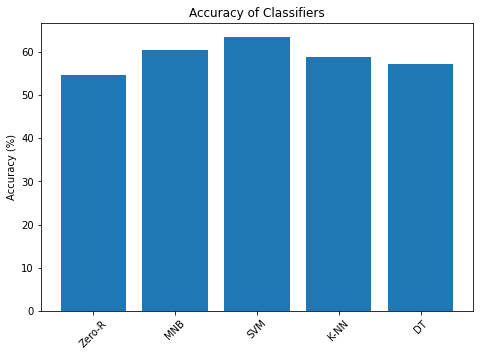

In [19]:
# Accuracy of base classifiers
# Graphs of Accuracy and Time taken in total
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classifiers = ['Zero-R','MNB', 'SVM', 'K-NN', 'DT']
accuracy = [zr_test_accuracy*100, nb_test_accuracy*100,svm_test_accuracy*100,knn_test_accuracy*100,tree_test_accuracy*100]
ax.bar(classifiers,accuracy)
plt.xticks(rotation=45)
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Classifiers')
plt.show()

In [20]:
(FN_mnb+FP_mnb).sum()

476

## Graphs

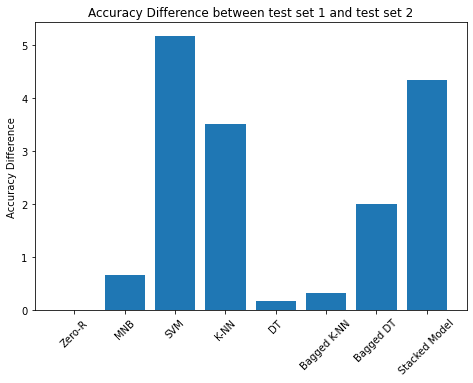

In [21]:
# Graphs of Accuracy Differences with different datasets
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classifiers = ['Zero-R', 'MNB', 'SVM', 'K-NN','DT', 'Bagged K-NN', 'Bagged DT', 'Stacked Model']
accuracy = [(zr_test_accuracy - zr_test_accuracy_another)*100,
            (nb_test_accuracy-nb_test_accuracy_another)*100,
            (svm_test_accuracy-svm_test_accuracy_2)*100,
            (knn_test_accuracy-knn_test_accuracy_2)*100,
            (tree_test_accuracy-tree_test_accuracy_2)*100,
            (knn_test_bag_accuracy-knn_test_bag_accuracy_2)*100,
            (bag_tree_test_accuracy-bag_tree_test_accuracy_2)*100,
            (stack_test_accuracy-stack_test_accuracy_2)*100]
ax.bar(classifiers,accuracy)
plt.xticks(rotation=45)
plt.ylabel('Accuracy Difference')
plt.title('Accuracy Difference between test set 1 and test set 2')
plt.show()





In [22]:
counts = {}
total = 0
for sentiment in y_test:
    if sentiment not in counts:
        counts[sentiment] = 1
    counts[sentiment]+=1
    total+=1

In [23]:
(counts[1]/total)

0.5483333333333333

In [24]:
len(tfidf_vectorizer.get_feature_names())

8156

In [25]:
X_train_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
len(BoW_vectorizer.get_feature_names())

29965

In [27]:
test = pd.DataFrame(X_test)
test[sentiment] = y_test_pred_mnb


In [28]:
pd.DataFrame(test).to_csv("result.csv")